In [1]:
import json
import matplotlib
import numpy as np

In [2]:
pfam_entry = set([])
with open('pfam_ir.json') as f:
    for line in f:
        output = json.loads(line)
        pfam_entry.add(output['domain'])

In [3]:
len(pfam_entry)

7472

In [4]:
# pfam domain recall, precision
topk = 100 #100
precision = []
recall = []
with open('pfam_domain_ir_k_100.json') as f:
    for line in f:
        output = json.loads(line)
        target = output['target domain']
        retrieved = output['retrieved domain'].split(',')[:topk]
        label = np.array([d==target for d in retrieved])
        recall.append(label.sum()>0)
        precision.append(label.mean())
precision = np.array(precision).mean()
recall = np.array(recall).mean()
print(precision)
print(recall)
        

0.9042463923906315
1.0


In [5]:
# pfam evalue
def parse_alignment(alignment_dir, ind):
    evalues = []
    with open(alignment_dir+'/'+str(ind)+".output") as f:
        for line in f:
            if line.startswith('+'):
                hit_ls = line.strip().split()
                evalues.append(float(hit_ls[1])*440000)
    return evalues

import math
from tqdm import tqdm
topk = 5
percentage = []
evalue = []

for index in tqdm(range(30000)):
    values = parse_alignment('retrieved_alignments', index)
    valids = min(len(values), topk)
    values_mean = np.array(values[:valids]).mean()
    
    if math.isnan(float(values_mean)):
        continue
    
    percentage.append(valids/topk)
    evalue.append(values_mean)
    
percentage = np.array(percentage).mean()
evalue = -np.ma.log(np.array(evalue))
evalue_mean = evalue.mean()

print(percentage)
print(evalue_mean)

 13%|█▎        | 3844/30000 [00:04<00:33, 774.12it/s]


KeyboardInterrupt: 

In [6]:
# scope retrieval 
topk = 100

# family precision & recall
precision = []
recall = []
with open('scope_ir_k_100.json') as f:
    for line in f:
        output = json.loads(line)
        target = output['target domain'].split()[1]
        retrieved = output['retrieved domain'].split('|')[:topk]
        retrieved = [d.split()[1] for d in retrieved]
        label = np.array([d==target for d in retrieved])
        recall.append(label.sum()>0)
        precision.append(label.mean())

precision = np.array(precision).mean()
recall = np.array(recall).mean()
print(precision)
print(recall)

# superfamily precision & recall
def get_superfamily(scope_index):
    index = scope_index.split('.')
    return '.'.join(index[:3])

precision = []
recall = []
with open('scope_ir_k_100.json') as f:
    for line in f:
        output = json.loads(line)
        target = get_superfamily(output['target domain'].split()[1])
        retrieved = output['retrieved domain'].split('|')[:topk]
        retrieved = [get_superfamily(d.split()[1]) for d in retrieved]
        label = np.array([d==target for d in retrieved])
        recall.append(label.sum()>0)
        precision.append(label.mean())

precision = np.array(precision).mean()
recall = np.array(recall).mean()
print(precision)
print(recall)

# fold precision & recall
def get_superfamily(scope_index):
    index = scope_index.split('.')
    return '.'.join(index[:2])

precision = []
recall = []
with open('scope_ir_k_100.json') as f:
    for line in f:
        output = json.loads(line)
        target = get_superfamily(output['target domain'].split()[1])
        retrieved = output['retrieved domain'].split('|')[:topk]
        retrieved = [get_superfamily(d.split()[1]) for d in retrieved]
        label = np.array([d==target for d in retrieved])
        recall.append(label.sum()>0)
        precision.append(label.mean())

precision = np.array(precision).mean()
recall = np.array(recall).mean()
print(precision)
print(recall)

# domain precision & recall
def get_superfamily(scope_index):
    index = scope_index.split('.')
    return '.'.join(index[:1])

precision = []
recall = []
with open('scope_ir_k_100.json') as f:
    for line in f:
        output = json.loads(line)
        target = get_superfamily(output['target domain'].split()[1])
        retrieved = output['retrieved domain'].split('|')[:topk]
        retrieved = [get_superfamily(d.split()[1]) for d in retrieved]
        label = np.array([d==target for d in retrieved])
        recall.append(label.sum()>0)
        precision.append(label.mean())

precision = np.array(precision).mean()
recall = np.array(recall).mean()
print(precision)
print(recall)


0.24710000000000001
1.0
0.42633
1.0
0.46003
1.0
0.6598399999999999
1.0


In [221]:
# scope retrieval 
topk = 5 #100

# species precision & recall
precision = []
recall = []

def get_species(scope_label):
    id = scope_label.find('TaxId')
    return scope_label[id:].strip('}').strip(']')

with open('scope_ir_k_100.json') as f:
    for line in f:
        output = json.loads(line)
        target = get_species(output['target domain'])
        retrieved = output['retrieved domain'].split('|')[:topk]
        retrieved = [get_species(d) for d in retrieved]
        label = np.array([d==target for d in retrieved])
        recall.append(label.sum()>0)
        precision.append(label.mean())

precision = np.array(precision).mean()
recall = np.array(recall).mean()
print(precision)
print(recall)

0.4304000000000001
1.0


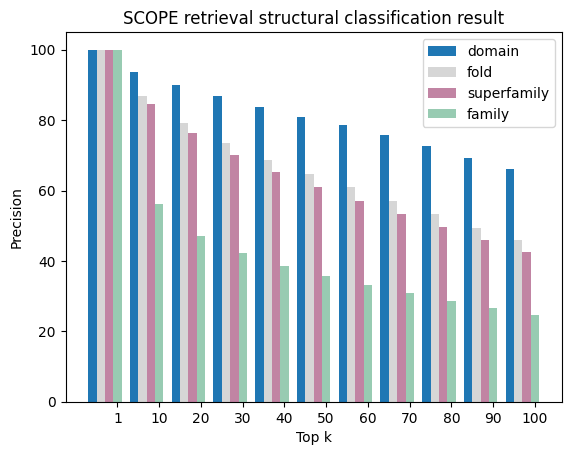

In [209]:

import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['1', '10','20','30','40','50','60','70','80','90','100']
domain_accuracy = [100,
93.8,
90.04,
86.74,
83.83,
81.01,
78.57,
75.67,
72.55,
69.34,
65.98]
fold_accuracy = [100,
86.92,
79.23,
73.46,
68.7,
64.57,
60.86,
57.03,
53.19,
49.47,
46.03]
superfamily_accuracy = [100,
84.49,
76.21,
70.11,
65.14,
60.92,
57.15,
53.3,
49.55,
45.93,
42.63]
family_accuracy = [100,
56.29,
47.13,
42.18,
38.6,
35.71,
33.27,
30.94,
28.68,
26.63,
24.71]


X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.6, domain_accuracy, 0.2, label = 'domain')
plt.bar(X_axis - 0.4, fold_accuracy , 0.2, label = 'fold', color=(0.2, 0.2, 0.2, 0.2))
plt.bar(X_axis - 0.2, superfamily_accuracy , 0.2, label = 'superfamily', color=(0.6, 0.2, 0.4, 0.6))
plt.bar(X_axis , family_accuracy , 0.2, label = 'family', color=(0.2, 0.6, 0.4, 0.5))
  
plt.xticks(X_axis, X)
plt.xlabel("Top k")
plt.ylabel("Precision")
plt.title("SCOPE retrieval structural classification result")
plt.legend()
plt.show()


In [8]:
import seaborn as sns
import pandas as pd

In [25]:
df=pd.DataFrame({'top k':[1,10,20,30,40,50,60,70,80,90,100,1,10,20,30,40,50,60,70,80,90,100],
                 'percentage':[99.85,99.97,99.99,99.99,99.99,99.99,99.99,100,100,100,100,99.85,94.51,93.38,92.72,92.24,91.83,91.5,91.19,90.91,90.67, 90.42], 
                'type':['recall']*11 + ['precision']*11})

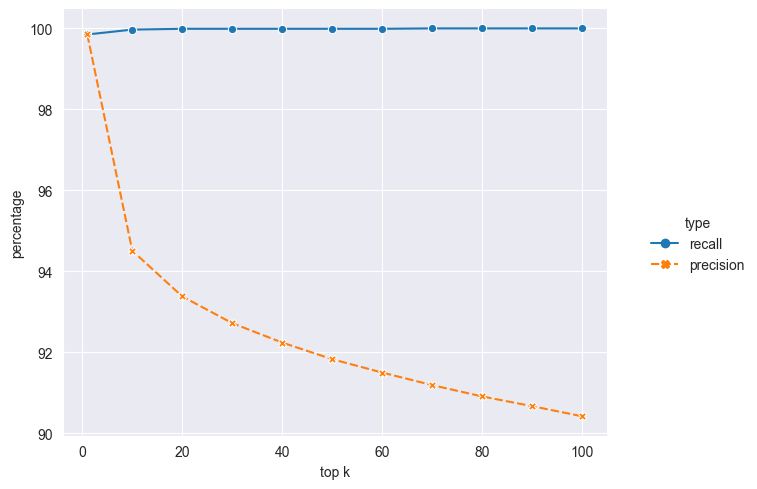

In [47]:
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
#sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
ax = sns.relplot(data=df, x="top k", y="percentage",hue="type", style='type', kind="line",markers=True)
ax.figure.set_size_inches(8,5)
ax.savefig('../img/pfam_retrieve.png')

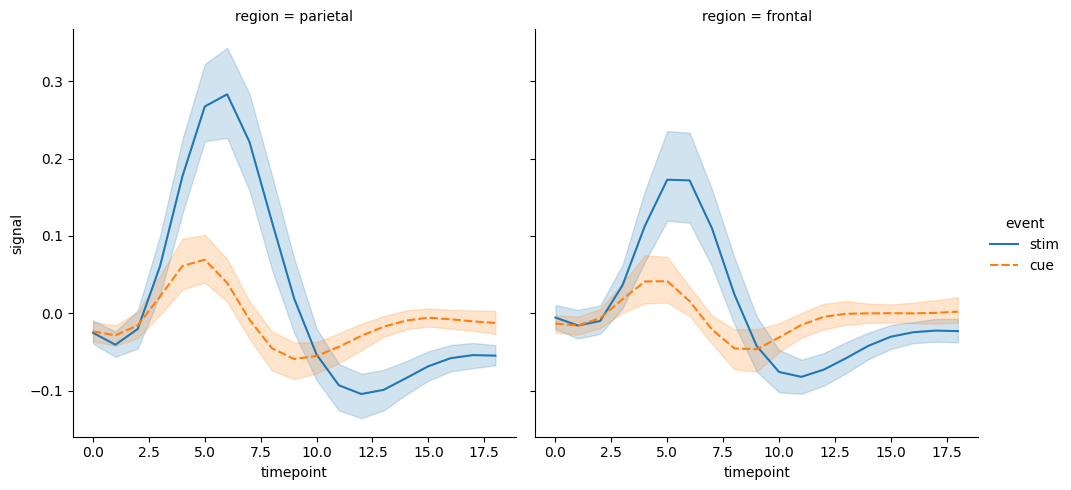